Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos
<br>

<center>
    <h2> Tarea 3 </h2>
    <h1> GMM y KNN </h1>
    <p>
        Profesor Marcelo Mendoza<br>
        Segundo Semestre 2023<br>    
        Fecha de entrega: Viernes 29 de Septiembre
    </p>
    <br>
</center>

<br>


## Indicaciones

Deberás entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se te dará puntaje tanto por código como por la manera en la que respondas las preguntas planteadas. Es decir, si tienes un código perfecto pero este no es explicado o no se responden preguntas asociadas a este, no se tendrá el puntaje completo.
- El notebook debe tener todas las celdas de código ejecutadas. Cualquier notebook que no las tenga no podrá ser corregido.
- El carácter de esta tarea es **INDIVIDUAL**. Cualquier instancia de copia resultará en un 1,1 como nota de curso.
- En el caso de que se encuentren con problemas al correr celdas por el tamaño del dataset, esta permitido trabajar con una muestra representativa de este, siempre explicitando y justificando sus deciciones.

---


## Librerías

In [1]:
##Importa acá las librerias que vayas a utilizar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.mixture import GaussianMixture

# Seed

In [2]:
from random import seed

seed(2433)
#No cambiar la seed ya que se usara para su recorrecion

# Parte 1: Carga y Preprocesamiento (10 puntos)

## 1.1 Carga de datos (2 puntos)

Para esta tarea deberás trabajar con el dataset que está en Canvas.

In [3]:
data = pd.read_csv('digits.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
u = pd.Series({c: data[c].unique() for c in data})
all = []
for c in u.values:
    all += c.tolist()
np.unique(all)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

## 1.2 Descripcion del Dataset (4 puntos)



#### ¿Qué representa cada fila en el dataset entregado? (2 puntos)

RESPUESTA:

Cada fila es un digito escrito a mano, donde cada columna es un pixel de la imagen con un valor de 0 a 225, por lo tanto expresado en escala de grises.


#### ¿Es posible en este dataset eliminar columnas sin afectar de manera significativa los datos? ¿Por qué? (2 puntos)

REPUESTA:
Si ya que hay columnas que no entregan información relevante, ya que solo tienen un valor posible. Esto se puede ver:

In [5]:
u

label       [1, 0, 4, 7, 3, 5, 8, 9, 2, 6]
pixel0                                 [0]
pixel1                                 [0]
pixel2                                 [0]
pixel3                                 [0]
                         ...              
pixel779                       [0, 62, 58]
pixel780                               [0]
pixel781                               [0]
pixel782                               [0]
pixel783                               [0]
Length: 785, dtype: object

Las columnas con un solo valor se consideran irrelevantes, ya que al ser el mismo valor para los datos, no dan caracteristicas distintivas para ellos.

## 1.3 Determina si existen datos nulos. En caso de que existan, eliminalos del dataset. (2 puntos)

RESPUESTA:

In [6]:
# check if there are any null values
data.isnull().values.sum()

0

No hay datos nulos en el dataset.

In [7]:
# en el caso de que si hubieran
if data.isnull().values.sum() > 0:
    data = data.fillna(0) # se rellenan con 0 ya que son pixeles y les dariamos valores negros a los vacios.

## 1.4 Manejo del Dataset (2 puntos)
Normaliza los valores de las columnas del dataset. ¿Por qué esto es importante?

RESPUESTA:

In [8]:
y = data['label']
data.drop('label', inplace=True, axis=1)
X = data

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Es importante normalizar las columnas del dataset por dos grandes razones. En primer lugar, para que todos los datos se encuentren en el mismo rango (en este caso ya se encontraban entre 0 y 225). Y segundo, para la generalización de los modelos, se trabaja con rangos de 0 a 1, por esta razón no es necesario generar un modelo nuevo cada vez que se trata un dataset distinto.

# Parte 2: Preguntas Teóricas (10 puntos)

### 2.1 ¿Qué es un modelo Gaussian Mixtures? ¿En qué escenarios funciona bien y en qué mal? Refierete a esto según el dataset. (5 puntos)

RESPUESTA:

Un modelo Gaussian Mixtures, es parecido a k-means, pero en vez de basarse en distancias, se basa en probabilidades. Supone que los datos con los que esta trabajando, probienen de una mezcla de distribuciónes gaussianas. A esto viene su denominación de un modelo de clustrering probabilistico.

Al ser un modelo probabilistico también es un modelo generativo, ya que trabaja con la probabilidad de una caracteristica presente en un dato.

GMM funciona bien con datos que efectivamente provienen de mezclas de distribuciones gaussianas

Podemos revisar la distribución del dataset

### 2.2 Explica qué es Akaike Information Criterion ¿Existe alguno que se ajuste mejor a este dataset? Justifique su respuesta. (5 puntos)

RESPUESTA:

# Parte 3: GMM (28 puntos)


## 3.1 PCA y Visualizacion Inicial (6 puntos)


Utiliza PCA de dos dimensiones para colorear los distintos digitos presentes en el dataset. (3 puntos)

RESPUESTA:

In [10]:
# pca
pca = PCA(n_components=2)
pca.fit(X)
X_ = pca.transform(X)

In [11]:
IMAGES = X

In [12]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler

def plot_embedding(X, y, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in y.unique():
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425, # The alpha blending value, between 0 (transparent) and 1 (opaque)
        )
        print(digit, plt.cm.Dark2(digit))
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            # don't show points that are too close
            print('skiped')
            continue
        im = IMAGES[i].reshape(28,28)
        shown_images = np.concatenate([shown_images, [X[i]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(im, cmap=plt.cm.gray_r), X[i] 
        ) # Container referring to a specific position xy defined by X[i]
        imagebox.set()
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (1314015001.py, line 27)

In [13]:
# color the different digits present in the dataset with pca
plot_embedding(X_, y, "PCA")    

NameError: name 'plot_embedding' is not defined

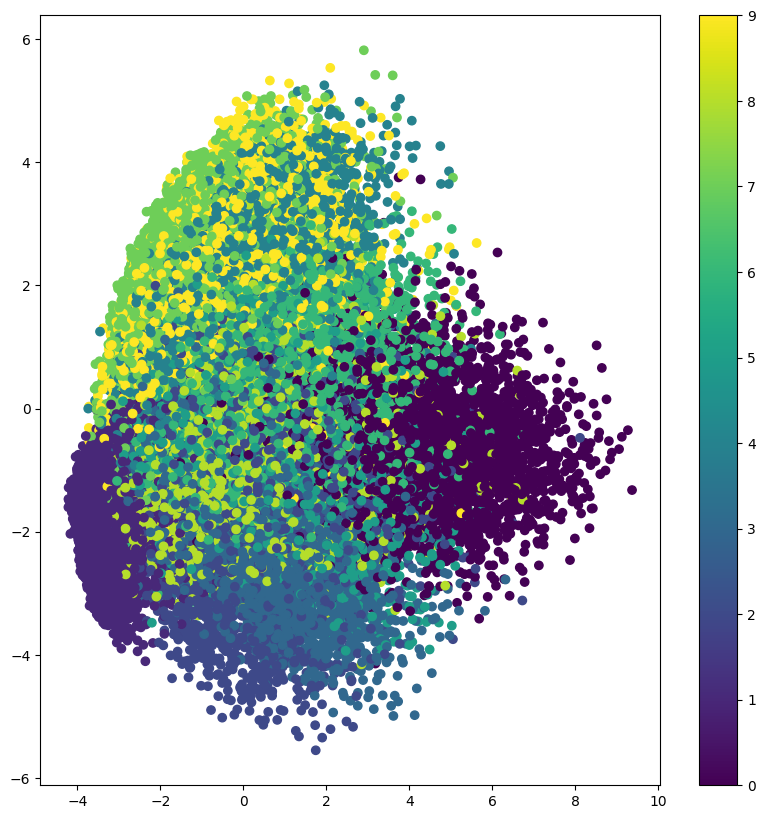

In [14]:
# color the different digits present in the dataset with pca
plt.figure(figsize=(10, 10))
plt.scatter(X_[:, 0], X_[:, 1], c=y)
plt.colorbar()
plt.show()

Visualizando los digitos, ¿Cuáles son los que más se parecen entre ellos? Especula en que cantidad de clusters sería posible agrupar a los digitos, fuera de un cluster por cada uno. (3 puntos)

RESPUESTA: Los digitos que más se parecen entre sí, son 
- 7 y 9
- 8 y 6
- 3 y 2

# 3.2 Retención Varianza (4 puntos)

Encuentre el numero mínimo de componentes para usar en PCA de tal manera que se mantenga un 75% de varianza. (4 puntos)

RESPUESTA: 33 componentes

In [15]:
pca75 = PCA(0.75)
pca75.fit(X)
X_pca75 = pca75.transform(X)

X_pca75.shape

(42000, 33)

# 3.3 Funcion clusterize (5 puntos)

Codifica una función que utiliza el modelo `GaussianMixture` de sklearn para separar a los digitos en `n` grupos. Debe retornar un dataframe que contenga la clasificación. Corre el método con `n=10`. (5 puntos)

RESPUESTA:

In [41]:
from sklearn import mixture

def myGaussianMixture(X, groups):
    gmm = mixture.GaussianMixture(n_components=groups, covariance_type="full")
    gmm.fit(X)
    if gmm.converged_:
        print('score : ', gmm.score(X, y))
        clusters = gmm.predict(X)
        return pd.DataFrame(clusters)
    return pd.DataFrame()
    

In [42]:
clusters = myGaussianMixture(X_, 10)

score :  -4.070914192681532


In [43]:
clusters[0].values

array([6, 5, 0, ..., 1, 2, 4], dtype=int64)

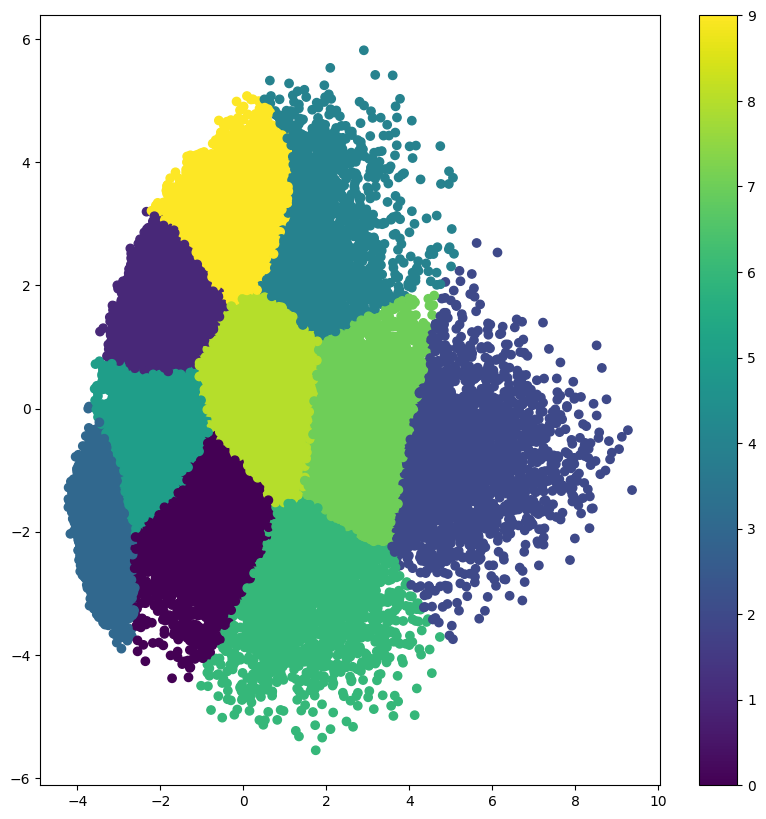

In [33]:
# color the different digits present in the dataset with pca
plt.figure(figsize=(10, 10))
plt.scatter(X_[:, 0], X_[:, 1], c=clusters[0].values)
plt.colorbar()
plt.show()

Se puede notar que se realizo una clasificación bastante extricta.

# 3.4 Preguntas con GMM (5 puntos)

#### 1. Dado cada cluster, ¿Se puede decir que GMM logro agrupar de forma correcta los distintos digitos? (2.5 puntos)

RESPUESTA: Si ya que secciona relaitvamente bien pero es muy categorico, pero al analizar el score es bastante malo.

#### 2. ¿Existe algún(os) digito que se encuentre repartido en mas de 2 clusters? ¿Cuáles? (2.5 puntos)

RESPUESTA:

In [47]:
clusters.insert(0, 'label', y)

In [52]:
clusters.groupby(['label']).mean()

,0
label,
0,4.230639
1,1.349701
2,4.818530
3,5.755918
4,3.893418
5,5.249802
6,4.773749
7,4.155192
8,5.028304


# 3.5 Evaluación modelo GMM (5 puntos)

Determine el dígito predominante de cada cluster según el número que más se repita por grupo. Con este digito determinado, calcule la precisión de cada dígito al ser clasificado. (5 puntos)

RESPUESTA:

# 3.6 Agrupación de Dígitos similares (3 puntos)

Corre la función clusterize pero ahora solamente con `4` grupos. Registra las nuevas clasificaciones en un dataframe. (3 puntos)

RESPUESTA:

Identifica los digitos que se agruparon en cada cluster y explica la razón de por cual el algoritmo GMM los podría haber agrupado de esa manera.

RESPUESTA:

# Parte 4: KNN (12 puntos)

## 4.1 Separar train y test (4 puntos)

Toma en cuenta el dataset retornado al correr la función clusterize con `n=10`.
Separa el conjunto de datos en train (75%) y test (25%).
Utiliza el ***cluster*** al cual pertenece cada dato como variable de respuesta (y). También determina e imprime la cantidad de datos por cada cluster.

RESPUESTA:

## 4.2 Determina el número óptimo de vecinos con KNeighborsClassifier. (4 puntos)
Los valores a probar son: 1, 5, 8 y 10. Utiliza la métrica score para justificar tu elección.

RESPUESTA:

## 4.3 Evalua el mejor clasificador de 4.2. (4 puntos)
 Comenta al respecto en el contexto del dataset acerca del rendimiento por cada cluster del mejor clasificador encontrado.

RESPUESTA: